# A Cyclic Graph


Let's introduce some complexity to our graph.
This time, the graph is cyclic, meaning that there are loops in the graph.


## The Collatz Conjecture

The Collatz conjecture is a famous unsolved problem in mathematics.
It is defined as follows:

- Start with any positive integer $n$.
- If $n$ is even, divide it by 2.
- If $n$ is odd, multiply it by 3 and add 1.
- Repeat the process until you reach 1.

The conjecture is that no matter what positive integer you start with, you will always reach 1 eventually!


In [1]:
from IPython.display import Image, display  # For displaying images
from pprint import pprint  # For pretty printing of JSON
from typing import TypedDict  # A dictionary with a known structure

from langgraph.graph import (
    StateGraph,
    START,
    END,
)  # For creating and running agentic workflows

## 1. Define the **State**

This time, our state will need to "remember" the number we are currently working with:


In [2]:
class State(TypedDict):
    n: int

## 2. Define the **Nodes**

Our graph will only have one node which calculates the next number in the sequence:


In [5]:
def collatz(state: State) -> State:
    current_n = state.get("n")
    print(f"n: {current_n}")

    if current_n % 2 == 0:
        next_n = current_n // 2  # Integer division
    else:
        next_n = 3 * current_n + 1

    return {"n": next_n}

## 3. Build the **Graph**

Now we can build our graph!

1. Create a new `StateGraph` object, defining it's concept of `state`
2. Add our nodes to the graph
3. Add edges between the nodes
4. "Compile" the graph


In [4]:
builder = StateGraph(State)

builder.add_node("my_first_node", my_first_node)

builder.add_edge(START, "my_first_node")
builder.add_edge("my_first_node", END)

graph = builder.compile()

`LangGraph` provides a nice method of visualizing the graph, which we can use to check our work:


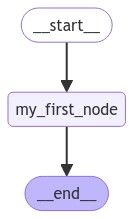

In [5]:
display(Image(graph.get_graph().draw_mermaid_png()))

## 4. Run the **Graph**

Now the exciting part! Let's execute our graph and see what happens:


In [6]:
initial_state = {"name": "Freddy"}

final_state = graph.invoke(initial_state)

Hello, Freddy! This is my first node!


In [7]:
pprint(final_state)

{'name': 'Freddy'}
